In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def RV(x, parameters): #function generates RV values plot from given parameters
    K, e, w, T, y = parameters[0], parameters[1], parameters[2], parameters[3], parameters[4]
    M = (2*np.pi/Period)*(x-T) #Mean Anomaly is a function of time
    E1 = M + e*np.sin(M) + ((e**2)*np.sin(2*M)/2) #Eccentric Anomaly is a function of Mean Anomaly
    while True: #iteratively refines estimate of E1 from initial estimate
        E0 = E1
        M0 = E0 - e*np.sin(E0)
        E1 = E0 +(M-M0)/(1-e*np.cos(E0))
        if np.amax(E1-E0) < 1E-9:
            break
    nu = 2*np.arctan(np.sqrt((1 + e)/(1 - e))*np.tan(E1/2)) #True Anomaly is a function of Eccentric anomaly
    p, s = (K*(np.cos(nu+w) + (e*np.cos(w)))+y), ((-K/mass_ratio)*(np.cos(nu+w) + (e*np.cos(w)))+y)
    return p, s

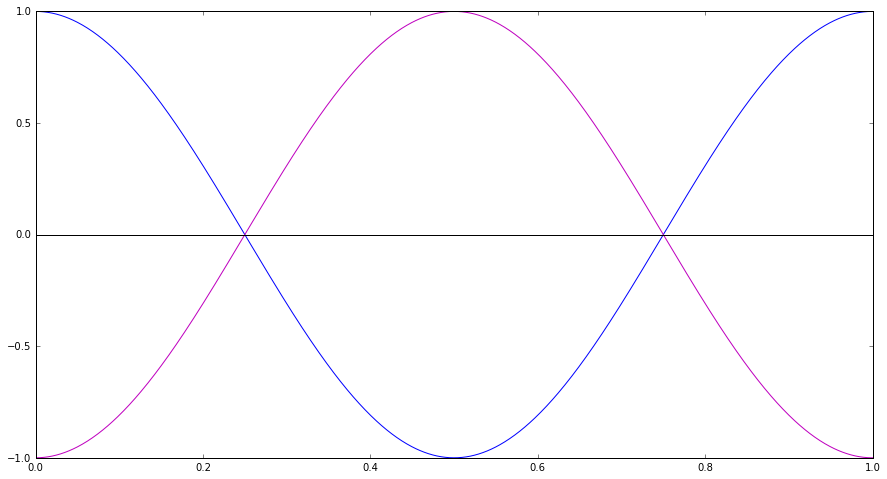

In [6]:
#These parameters are shared by the entire system, DQTau

Period = 1 #period in days determined first via periodogram
mass_ratio = 1

T = 0 #Time offset in days, boils down to a horizontal shift in RV. T is the 'zero' point
e = 0 #eccentricity (unitless)
w = 0 #longitude of periastron in radians
y = 0 #systemic velocity in km/s
x = np.linspace(0, Period, num = 1000) #provides independent variable values

#these parameters are star specific
K= 1 #semamplitude in km/s

parameters = K, T, e, w, y

primary, secondary = RV(x, parameters)
plt.figure(figsize=(15,8))
plt.plot(x/Period, primary)
plt.plot(x/Period, secondary, 'm')
plt.plot(x/Period, y*np.ones(len(x)), 'k')
#plt.xlim(0,Period)